In [2]:
#HARSHA - CH.SC.U4CSE23020
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import seaborn as sn

In [10]:
data = pd.read_csv('diabetes.xls')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
x = data.iloc[:,:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y = data.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8)

(154, 8)

(614,)

(154,)

In [18]:
model = LogisticRegression(solver='lbfgs', max_iter = 1000)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [20]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100), '%')

Confusion Matrix :  [[89 11]
 [18 36]]
Accuracy Score :  0.8116883116883117
Accuracy in Percentage :  81 %


<Axes: xlabel='Predicted', ylabel='Actual'>

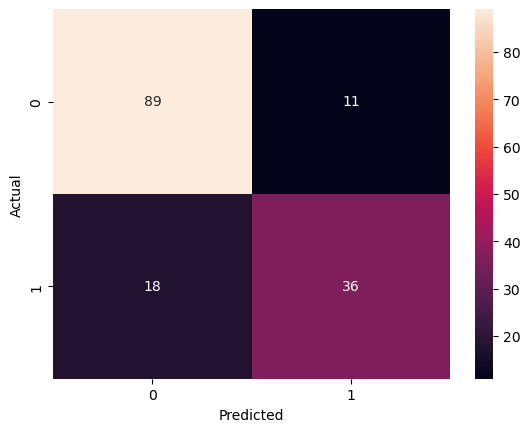

In [21]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames=['Predicted' ])
sn.heatmap(conf_mat, annot=True)